<a href="https://colab.research.google.com/github/maalpi/HipoteseFutebol/blob/main/HipoteseFutebol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você trabalha como jornalista esportivo em uma grande empresa de mídia esportiva on-line, especializado em análises e reportagens de futebol. Você assiste a partidas internacionais de futebol masculino e feminino há vários anos e seu instinto lhe diz que são marcados mais gols em partidas internacionais de futebol feminino do que em partidas masculinas. Isso daria um artigo investigativo interessante que seus assinantes adorariam, mas você precisará realizar um teste de hipótese estatística válido para ter certeza!

Ao definir o escopo deste projeto, você reconhece que o esporte mudou muito ao longo dos anos e que os desempenhos provavelmente variam muito dependendo do torneio, então você decide limitar os dados usados ​​na análise apenas aos jogos oficiais da Copa do Mundo da FIFA (sem incluir eliminatórias) desde 01/01/2002.

Você cria dois conjuntos de dados contendo os resultados de todas as partidas oficiais de futebol internacional masculino e feminino desde o século 19, que você extraiu de uma fonte online confiável. Esses dados são armazenados em dois arquivos CSV: women_results.csv e men_results.csv.

A pergunta para a qual você está tentando determinar a resposta é:

> São marcados mais gols em partidas internacionais de futebol feminino do que em partidas masculinas?

Você assume um **nível de significância de 10%** e usa as seguintes hipóteses nulas e alternativas:

$H_0$ : O número médio de gols marcados em partidas internacionais de futebol feminino é igual ao masculino.

$H_A$ : A média de gols marcados em partidas internacionais de futebol feminino é maior que a masculina.

In [3]:
!pip install pingouin
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import kstest

men_df = pd.read_csv('./sample_data/men_results.csv')
women_df = pd.read_csv('./sample_data/women_results.csv')

# Filtrando as partidas das copas do mundo a partir de 2002
men_df = men_df.loc[(men_df['tournament'] == 'FIFA World Cup') & (men_df['date'] > '2002-01-01')]
women_df = women_df.loc[(women_df['tournament'] == 'FIFA World Cup') & (women_df['date'] > '2002-01-01')]

women_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


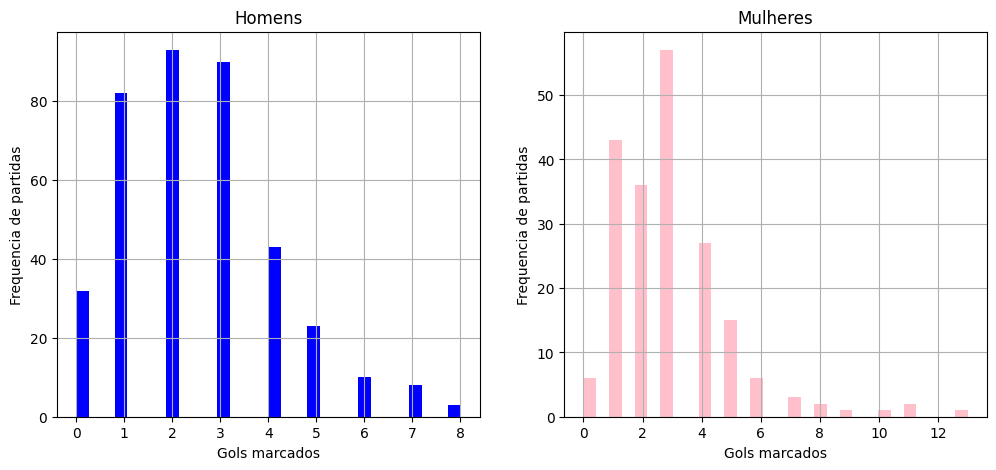

ERRO: Dados femininos não distribuidos normalmente
ERRO: Dados masculinos não distribuidos normalmente


In [4]:
# H0: gols feminino - gols masculinos = 0
# Ha: gols feminino - gols masculinos != 0
# Nível de significancia = 10%


# Declarando nivel de significancia
alpha = 0.1

# Primeiro criamos as colunas dos gols marcados por partida em cada  DataFrame
men_df['goals_scored'] = men_df['home_score'] + men_df['away_score']
women_df['goals_scored'] = women_df['home_score'] + women_df['away_score']

# Determinando normalidade usando histogramas
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
men_df['goals_scored'].hist(bins=30,color='blue');
plt.title('Homens')
plt.xlabel('Gols marcados')
plt.ylabel('Frequencia de partidas')

plt.subplot(1,2,2)
women_df['goals_scored'].hist(bins=30,color='pink');
plt.title('Mulheres')
plt.xlabel('Gols marcados')
plt.ylabel('Frequencia de partidas')

plt.show()

# Agora vamos buscar a normalidade visualizando o P de cada dataframe

#Mulheres
statistic,p_value = kstest(women_df['goals_scored'], 'norm', args=(women_df['goals_scored'].mean(), women_df['goals_scored'].std()))

if p_value > alpha:
    print('Dados femininos distribuidos normalmente')
else:
    print('ERRO: Dados femininos não distribuidos normalmente')

#Homens
statistic,p_value = kstest(men_df['goals_scored'], 'norm', args=(men_df['goals_scored'].mean(), men_df['goals_scored'].std()))

if p_value > alpha:
    print('Dados masculinos distribuidos normalmente')
else:
    print('ERRO: Dados masculinos não distribuidos normalmente')



In [5]:
# Como não há distribuição normal para ambos os gráficos e é um gráfico distorcido à direita, podemos usar o teste não paramétrico, que é o teste de Wilcoxon-Mann-Whitney. Calculando na calda direita
result = pg.mwu(women_df['goals_scored'], men_df['goals_scored'], alternative="greater")
p_val = result['p-val'].values[0]
print(p_val)

0.005106609825443641


In [6]:
# Agora vamos para o resultado final, o enunciado pediu para salvarmos em um dicionario com o valor de P e o resultado, então:
resultado = 'n'
if p_val <= alpha:
    resultado = 'reject'
else:
    resultado = 'fail to reject'

result_dict = {"p_val": p_val, "result": resultado}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}